# alua de cluster hierarquicos 
## usado para descobrir sub grupos atravez de um dendrograma 

* ## Um dendrograma É: Um graficos em formato de arvore que é ultil para mostrar visualmente linhagem e relacionamentos entre observaçoes 
----
 
## onde podemos usar 
* ## gerenciameto de recursos hospitalar 
* ## linhagem genetica 
* ## Seguimentação de usuario 
* ## Analise de redes sociais 
----

## Parametros importante 

#### 1- metricas de distancia 
* ## Euclidian
* ## manhattan
* ## cosine

#### 2- parametro de conexao 
* ## ward
* ## Average
 complete

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('dados/mtcars.csv')
nomes = {'Unnamed: 0': 'nome',}
df.rename(columns=nomes, inplace=True)

In [15]:
x = df[['mpg', 'disp', 'hp', 'wt']].values
y = df['am'].values

### gerando o dendrograma com scipy 

In [56]:
z = linkage(x, 'ward')

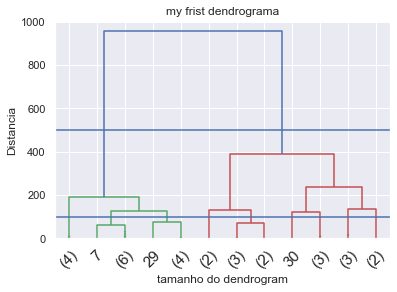

In [57]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, 
            show_contracted=True)
plt.title('my frist dendrograma')
plt.xlabel("tamanho do dendrogram")
plt.ylabel('Distancia')
plt.axhline(y=500)
plt.axhline(y=100)
plt.show()

In [39]:
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(x)
accuracy_score(y, hcluster.labels_)

0.78125

In [40]:
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(x)
accuracy_score(y, hcluster.labels_)

0.4375

In [50]:
z = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(x)
accuracy_score(y, hcluster.labels_)

0.4375

In [51]:
hcluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average').fit(x)
accuracy_score(y, hcluster.labels_)

0.71875

In [52]:
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(x)
accuracy_score(y, hcluster.labels_)

0.4375

# testes 

In [61]:
df[['mpg', 'disp', 'hp', 'wt']]

,mpg,disp,hp,wt
0,21.0,160.0,110,2.620
1,21.0,160.0,110,2.875
2,22.8,108.0,93,2.320
3,21.4,258.0,110,3.215
4,18.7,360.0,175,3.440
5,18.1,225.0,105,3.460
6,14.3,360.0,245,3.570
7,24.4,146.7,62,3.190
8,22.8,140.8,95,3.150
9,19.2,167.6,123,3.440
